### Importing necessary libraries and reading dataset

In [1]:
# Initially importing necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Uploading and reading the dataset
df='Fraud.csv'

df=pd.read_csv(df)

In [3]:
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [4]:
print(df.tail())

         step      type      amount     nameOrig  oldbalanceOrg  \
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
6362615             0.0   C776919290            0.00       339682.13        1   
6362616             0.0  C1881841831            0.00            0.00        1   
6362617             0.0  C1365125890        68488.84      6379898.11        1   
6362618             0.0  C2080388513            0.00            0.00        1   
6362619             0.0   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
6362615               0  
6362616               0  
6362617               0  
636261

In [5]:
print(df.shape)
df.info()


(6362620, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Handling the Missing values

In [6]:
#Checking for missing values
missing=df.isnull().values.any()
if missing:
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")
    print(df.isnull().sum())



There are no missing values in the dataset.
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


### To find the outliers in the dataset

In [7]:

# Calculating IQR
iqr=df.describe(include='all').loc['75%']-df.describe(include='all').loc['25%']
print(iqr)

step                    179.0
type                      NaN
amount            195331.9075
nameOrig                  NaN
oldbalanceOrg      107315.175
newbalanceOrig      144258.41
nameDest                  NaN
oldbalanceDest    943036.7075
newbalanceDest     1111909.25
isFraud                   0.0
isFlaggedFraud            0.0
dtype: object


In [8]:
# Assuming 'df' is your DataFrame and 'iqr' is the calculated IQR
lower_bound = df.describe().loc['25%'] - 1.5 * iqr
upper_bound = df.describe().loc['75%'] + 1.5 * iqr


In [9]:
# Align the DataFrame 'df' and the bounds using the 'align' method
df_aligned, lower_bound_aligned = df.align(lower_bound, axis=1, copy=False)
df_aligned, upper_bound_aligned = df.align(upper_bound, axis=1, copy=False)

# Create a mask for outliers
outliers_mask = (df_aligned < lower_bound_aligned) | (df_aligned > upper_bound_aligned)


In [10]:
# Count the number of outliers in each column
outliers_count = outliers_mask.sum()


In [11]:
# Display columns with outlier counts
print("Outliers Count in Each Column:")
print(outliers_count)

# Display the rows with at least one outlier
rows_with_outliers = df[outliers_mask.any(axis=1)]
print("Rows with Outliers:")
print(rows_with_outliers)

Outliers Count in Each Column:
amount             338078
isFlaggedFraud         16
isFraud              8213
nameDest                0
nameOrig                0
newbalanceDest     738527
newbalanceOrig    1053391
oldbalanceDest     786135
oldbalanceOrg     1112507
step               102688
type                    0
dtype: int64
Rows with Outliers:
         step      type      amount     nameOrig  oldbalanceOrg  \
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
14          1   PAYMENT     4098.78  C1026483832      503264.00   
37          1   PAYMENT     2791.42   C923341586      300481.00   
38          1   PAYMENT     7413.54  C1470868839      297689.58   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C116292233

### Reducing the effect of outliers by transformation process

In [12]:
# Assuming 'df' is your DataFrame
# Select only the numeric columns for log transformation
numeric_columns = df.select_dtypes(include=np.number).columns

# Apply log transformation to the selected numeric columns
df_transformed = df.copy()
df_transformed[numeric_columns] = np.log1p(df[numeric_columns])



In [13]:
print(df_transformed)

             step      type     amount     nameOrig  oldbalanceOrg  \
0        0.693147   PAYMENT   9.194276  C1231006815      12.044359   
1        0.693147   PAYMENT   7.531166  C1666544295       9.964112   
2        0.693147  TRANSFER   5.204007  C1305486145       5.204007   
3        0.693147  CASH_OUT   5.204007   C840083671       5.204007   
4        0.693147   PAYMENT   9.364703  C2048537720      10.634773   
...           ...       ...        ...          ...            ...   
6362615  6.612041  CASH_OUT  12.735768   C786484425      12.735768   
6362616  6.612041  TRANSFER  15.657870  C1529008245      15.657870   
6362617  6.612041  CASH_OUT  15.657870  C1162922333      15.657870   
6362618  6.612041  TRANSFER  13.652996  C1685995037      13.652996   
6362619  6.612041  CASH_OUT  13.652996  C1280323807      13.652996   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  \
0             11.984786  M1979787155        0.000000        0.000000   
1              

### Data Exploration

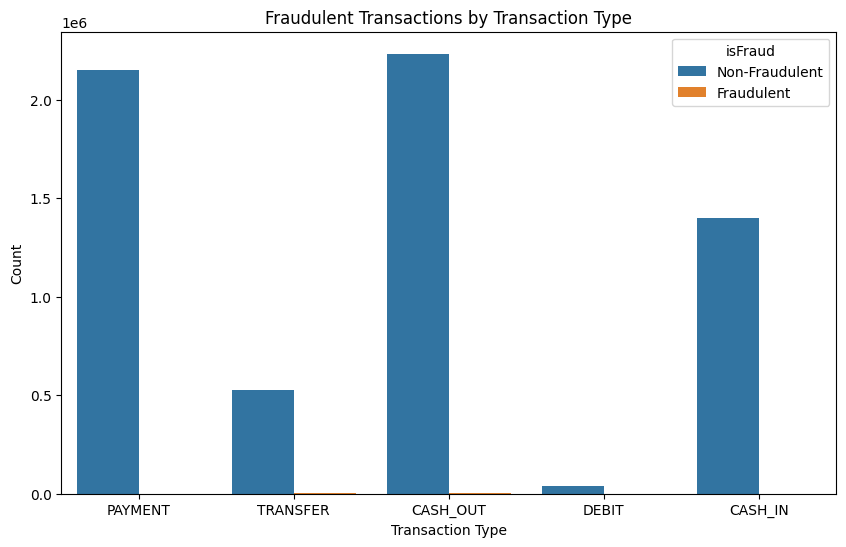

In [14]:
#Transaction Types vs. Fraudulent Transactions

plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Fraudulent Transactions by Transaction Type')
plt.legend(title='isFraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


In [15]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [16]:
# Calculate the count of fraudulent and non-fraudulent transactions
fraudulent_count = df['isFraud'].value_counts()[1]
non_fraudulent_count = df['isFraud'].value_counts()[0]

print("Number of Fraudulent Transactions:", fraudulent_count)
print("Number of Non-Fraudulent Transactions:", non_fraudulent_count)


Number of Fraudulent Transactions: 8213
Number of Non-Fraudulent Transactions: 6354407


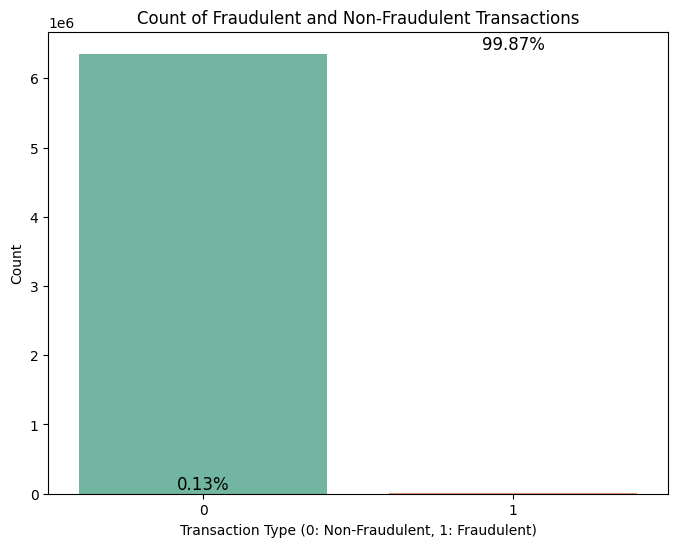

In [17]:
# Calculate the total number of transactions
total_transactions = len(df)

# Calculate the percentage of fraudulent and non-fraudulent transactions
fraudulent_percentage = (fraudulent_count / total_transactions) * 100
non_fraudulent_percentage = (non_fraudulent_count / total_transactions) * 100

# Plot the count of fraudulent and non-fraudulent transactions using Seaborn's countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='isFraud', palette='Set2')
plt.xlabel('Transaction Type (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.title('Count of Fraudulent and Non-Fraudulent Transactions')

# Add text annotation for percentage on the bars
plt.text(0, fraudulent_count, f"{fraudulent_percentage:.2f}%", ha='center', va='bottom', fontsize=12, color='black')
plt.text(1, non_fraudulent_count, f"{non_fraudulent_percentage:.2f}%", ha='center', va='bottom', fontsize=12, color='black')

plt.show()

### Finding unique values and eliminating to plot co-relation matrix

In [18]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [19]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [20]:
pd.set_option('display.float_format', '{:.2f}'.format) 

# To see actual values
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [21]:
df.describe(include='object')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [22]:
# Select only the numerical columns and print correlation matrix
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)


                step  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
step            1.00    0.02          -0.01           -0.01            0.03   
amount          0.02    1.00          -0.00           -0.01            0.29   
oldbalanceOrg  -0.01   -0.00           1.00            1.00            0.07   
newbalanceOrig -0.01   -0.01           1.00            1.00            0.07   
oldbalanceDest  0.03    0.29           0.07            0.07            1.00   
newbalanceDest  0.03    0.46           0.04            0.04            0.98   
isFraud         0.03    0.08           0.01           -0.01           -0.01   
isFlaggedFraud  0.00    0.01           0.00            0.00           -0.00   

                newbalanceDest  isFraud  isFlaggedFraud  
step                      0.03     0.03            0.00  
amount                    0.46     0.08            0.01  
oldbalanceOrg             0.04     0.01            0.00  
newbalanceOrig            0.04    -0.01            0.00 

<Axes: >

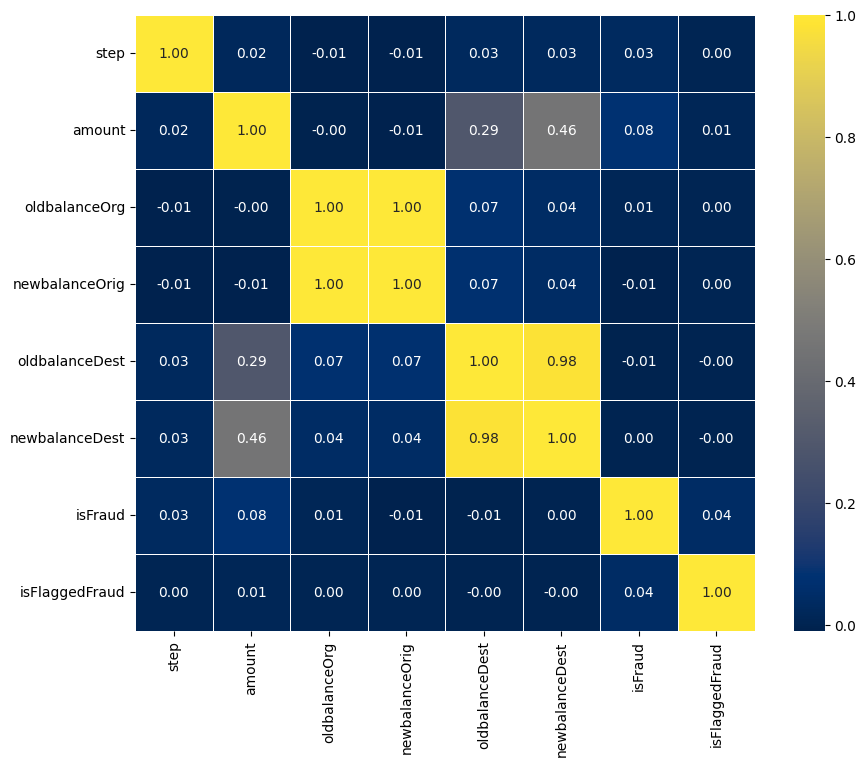

In [23]:
plt.figure(figsize=(10,8))
custom_cmap = 'cividis'
sns.heatmap(numeric_columns.corr(),annot=True,cmap=custom_cmap, fmt='.2f', linewidths=0.5)

* Graph interprets that there is multi-collinearity between oldbalanceOrg and newbalanceOrig , oldbalanceDest and newbalanceDest

### Feature Selection & Conversion

In [24]:

df[df.select_dtypes('object').columns] = df[df.select_dtypes('object').columns].apply(lambda x: pd.factorize(x)[0])


In [25]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,0,170136.00,160296.36,0,0.00,0.00,0,0
1,1,0,1864.28,1,21249.00,19384.72,1,0.00,0.00,0,0
2,1,1,181.00,2,181.00,0.00,2,0.00,0.00,1,0
3,1,2,181.00,3,181.00,0.00,3,21182.00,0.00,1,0
4,1,0,11668.14,4,41554.00,29885.86,4,0.00,0.00,0,0


In [26]:
x = df.drop(columns=['isFraud','isFlaggedFraud'])
y = df['isFraud']


In [27]:
y.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [28]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [29]:
df['type'].value_counts()

type
2    2237500
0    2151495
4    1399284
1     532909
3      41432
Name: count, dtype: int64

In [30]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE(random_state=0)
x,y = over_sample.fit_resample(x,y)
y.value_counts()

isFraud
0    6354407
1    6354407
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

### Implementing Xgboost Classification Model

In [1]:
# Using XGBOOST


import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split


In [33]:
y_binary = y.apply(lambda x: 1 if x == 1 else 0)
x_train, x_test, y_train, y_test = train_test_split(x, y_binary, test_size=0.2, random_state=42)

In [34]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [35]:
y_pred = xgb_classifier.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Discretize the predicted and actual values into classes (0 or 1) for binary classification
y_pred_class = [1 if pred >= 0.5 else 0 for pred in y_pred]
y_test_class = [1 if val >= 0.5 else 0 for val in y_test]

accuracy_model1 = accuracy_score(y_test_class, y_pred_class)
conf_matrix_model1 = confusion_matrix(y_test_class, y_pred_class)
classification_rep__model1 = classification_report(y_test_class, y_pred_class)

# Print the evaluation metrics
print("Accuracy:", accuracy_model1)
print("Confusion Matrix:")
print(conf_matrix_model1)
print("Classification Report:")
print(classification_rep__model1)

Accuracy: 0.9986953937090122
Confusion Matrix:
[[1268290    2547]
 [    769 1270157]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270837
           1       1.00      1.00      1.00   1270926

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



### Implementing Logistic Regression Model

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log_reg = LogisticRegression()

In [40]:
log_reg.fit(X_train,Y_train)

c:\Users\Anushka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
Y_pred = log_reg.predict(X_test)

In [42]:
#Actual value and the predicted value
diff = pd.DataFrame({'Actual value': Y_test, 'Predicted value': Y_pred})
diff.head()

,Actual value,Predicted value
12509874,1,1
2015253,0,0
8727240,1,1
2819369,0,0
6244200,0,1


In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Discretize the predicted and actual values into classes (0 or 1) for binary classification
Y_pred_class = [1 if pred >= 0.5 else 0 for pred in Y_pred]
Y_test_class = [1 if val >= 0.5 else 0 for val in Y_test]

accuracy_model2 = accuracy_score(Y_test_class, Y_pred_class)
conf_matrix_model2 = confusion_matrix(Y_test_class, Y_pred_class)
classification_rep__model2 = classification_report(Y_test_class, Y_pred_class)

# Print the evaluation metrics
print("Accuracy:", accuracy_model2)
print("Confusion Matrix:")
print(conf_matrix_model2)
print("Classification Report:")
print(classification_rep__model2)



Accuracy: 0.8928059129554416
Confusion Matrix:
[[1825742   80233]
 [ 328460 1578210]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90   1905975
           1       0.95      0.83      0.89   1906670

    accuracy                           0.89   3812645
   macro avg       0.90      0.89      0.89   3812645
weighted avg       0.90      0.89      0.89   3812645



### Implementing KNN

In [44]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [45]:
x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=42)

In [46]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [48]:
knn_classifier.fit(x1_train, y1_train)

KNeighborsClassifier()

In [50]:
# Predict on the test set
y1_pred = knn_classifier.predict(x1_test)

In [51]:
#Actual value and the predicted value
diff = pd.DataFrame({'Actual value': y1_test, 'Predicted value': y1_pred})
diff.head()

,Actual value,Predicted value
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Discretize the predicted and actual values into classes (0 or 1) for binary classification
y1_pred_class = [1 if pred >= 0.5 else 0 for pred in y1_pred]
y1_test_class = [1 if val >= 0.5 else 0 for val in y1_test]

accuracy_model3 = accuracy_score(y1_test_class, y1_pred_class)
conf_matrix_model3 = confusion_matrix(y1_test_class, y1_pred_class)
classification_rep__model3 = classification_report(y1_test_class, y1_pred_class)

# Print the evaluation metrics
print("Accuracy:", accuracy_model3)
print("Confusion Matrix:")
print(conf_matrix_model3)
print("Classification Report:")
print(classification_rep__model3)

Accuracy: 0.915
Confusion Matrix:
[[108   4]
 [ 13  75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       112
           1       0.95      0.85      0.90        88

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



In [54]:
models = ['Model 1', 'Model 2', 'Model 3']
accuracy_values = [accuracy_model1, accuracy_model2, accuracy_model3]

comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_values,})

print(comparison_df)

     Model  Accuracy
0  Model 1      1.00
1  Model 2      0.89
2  Model 3      0.92


### Answers to few questions:


##### 1. How did you select variables to be included in the model? What are the key factors that predict fraudulent customer?
Answer :

We get this comclusion by studing the multi-collinearity matrix
* Hence we consider the following features for our models : amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest newbalanceDest. The isFraud parameter will help us in further checking our output values.
The following models were selected to include in out model as 
1. amount: can be helpful in detecting the large or small transactions that might be fraudental.
2. oldbalanceOrg: This will help identifying abnormal transactions.
3. newbalanceOrig: Helps in detecting unexpected changes in the balance.
4. oldbalanceDest: Can be helpful in certain scenarios to compare the transactions before and after value of a particular account.
5. newbalanceDest: Helps detect unusual changes in balances.

##### 2. Do these factors make sense? If yes, How? If not, How not? 
Answer:

Yes, these factors make sense as they have collinearity and each factor has an influence on the other. As explained in the above example each paarmeter plays a vital role in detecting if the transaction is fraud or not.

##### 3. Describe your fraud detection model in elaboration.
Answer:

* Model 1 : The XGboost classifer
I preferred using Xgboost because the data was imbalanced and as Xgboost performs well with such dataset I choosed to implement it. Even though for the latter implementation and to get accuracy I have implemented SMOTE technique for oversmapling the minority samples to get better accuracy. The accuracy for this model is 100%.

* Model 2 : Logistic Regression
Though the accuracy of the model is low i.e 89% yet this model is helpful in understanding the features that influence the fraud transactions and help make predictions even though there are some synthetic datasets added.

* Model 3 : K-Nearest Neighbors (KNN) Classifier:
  It works by identifying the k-nearest data points (transactions) to a given transaction and classifying it based on the majority class of its neighbors & can be effective in detecting local patterns and anomalies in the data. The accuracy for this model is 92%.

##### 4. What kind of prevention should be adopted while company update its infrastructure?
Answer:

While updating infrastructure for fraud detection, companies should consider implementing multi-factor authentication, encryption, and regular security audits. Real-world examples include using biometric authentication, tokenization of sensitive data, and continuous monitoring for suspicious activities to prevent unauthorized access and protect against fraudulent transactions.

##### 5. Assuming these actions have been implemented, how would you determine if they work?
Answer:

To determine if the implemented actions work, companies should analyze metrics such as the reduction in successful fraudulent transactions, improved customer trust, and decreased unauthorized access incidents. Regular security assessments and monitoring for anomalous activities can provide insights into the system's effectiveness in mitigating fraud risks and maintaining data confidentiality.
